In [1]:
import sys
import pandas as pd
import numpy as np
import json
import re

from IPython.display import display

%matplotlib inline

In [2]:
questions = pd.read_csv("questions.csv", encoding='utf-8',delimiter=';')
questions = questions[questions['legislature'] != 14]
questions_14 = pd.read_csv('../questions_14.csv');
questions = pd.concat([questions , questions_14])
questions.index = pd.to_datetime(questions['date'])
replannee = re.compile('\-.*')
questions['annee'] = questions.date.apply(lambda s: replannee.sub('', s))
questions.sort('date').head()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,annee,date,legislature,parlementaire,url
date,,,,,
1986-04-07,1986,1986-04-07,8,M. Pasquini Pierre,http://questions.assemblee-nationale.fr/q8/8-3...
1986-04-07,1986,1986-04-07,8,M. Bourg-Broc Bruno,http://questions.assemblee-nationale.fr/q8/8-7...
1986-04-07,1986,1986-04-07,8,M. Bourg-Broc Bruno,http://questions.assemblee-nationale.fr/q8/8-7...
1986-04-07,1986,1986-04-07,8,M. Bourg-Broc Bruno,http://questions.assemblee-nationale.fr/q8/8-7...
1986-04-07,1986,1986-04-07,8,M. Bourg-Broc Bruno,http://questions.assemblee-nationale.fr/q8/8-7...


In [ ]:
questions.to_csv('questions.csv' , index=False)

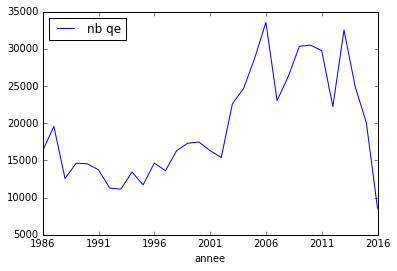

In [3]:
questions.groupby(['annee'])[['url']].count().rename(columns = {'url':'nb qe'}).plot()

In [4]:
stats = questions.groupby(['legislature', 'date'])[['url']].count().rename(columns = {'url':'nb qe'}).unstack('legislature')
stats.columns = [8, 9, 10, 11, 12, 13, 14]
stats.index = pd.to_datetime(stats.index)

In [5]:
stats = stats.fillna(0)

In [6]:
stats.resample('Q', how='sum').head()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


,8,9,10,11,12,13,14
date,,,,,,,
1986-06-30,5208.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-09-30,4402.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-12-31,6689.0,0.0,0.0,0.0,0.0,0.0,0.0
1987-03-31,5863.0,0.0,0.0,0.0,0.0,0.0,0.0
1987-06-30,6069.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_plot = pd.DataFrame(stats.resample('Q', how='sum'))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


In [8]:
#df_plot.head()
#df_plot.info()

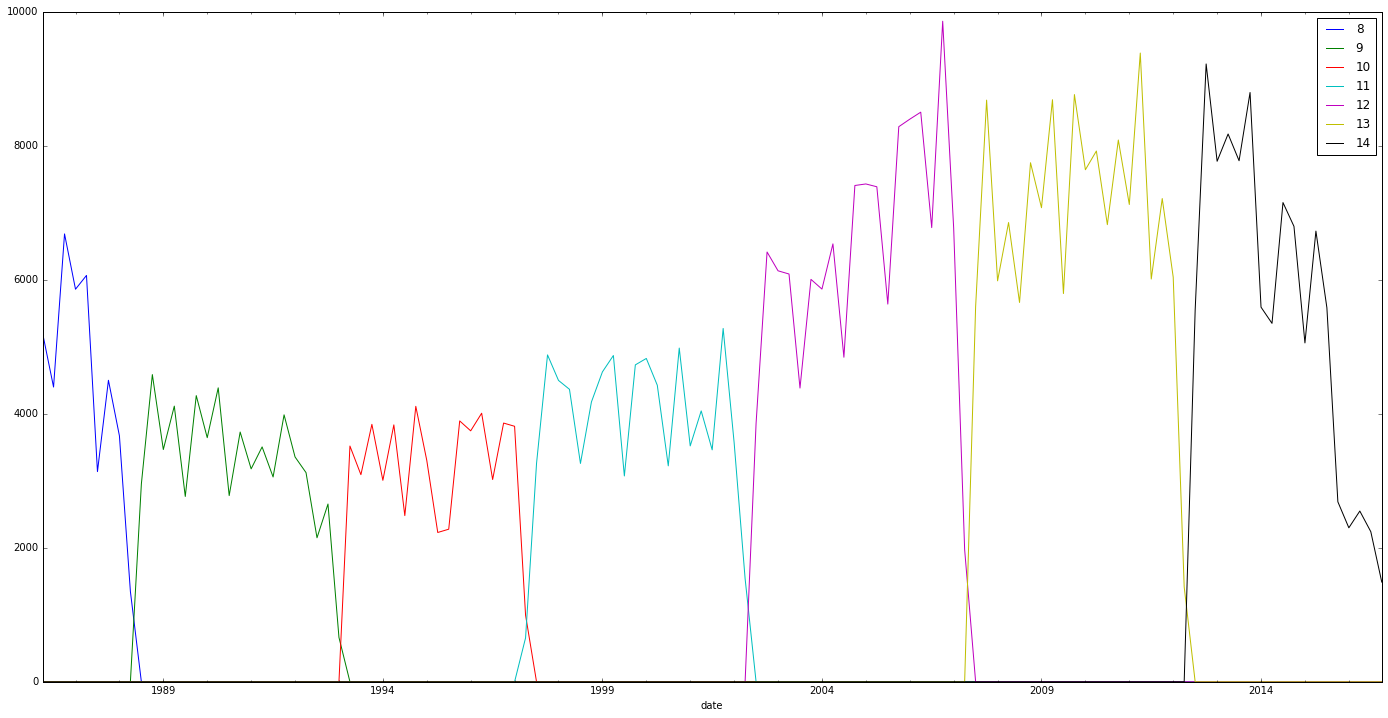

In [9]:
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(ncols=1, figsize=(16, 8))
#df1.plot.line(time, [signal, estimator, residue], ax=axs[0] , grid = True)

df_plot.columns = ['8', '9', '10', '11', '12', '13', '14']
df_plot.plot.line(figsize=(24, 12))

# [8, 9, 10, 11, 12, 13, 14])

# ['8', '9', '10', '11', '12', '13', '14']

In [10]:
df_plot_day = questions.groupby(['date' , 'legislature'])['url'].count().rename(columns = {'url':'nb qe'}).unstack('legislature')
df_plot_day = df_plot_day.fillna(0)
df_plot_day.head()

legislature,8,9,10,11,12,13,14
date,,,,,,,
1986-04-07,106.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-14,154.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-17,14.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-21,246.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-24,27.0,0.0,0.0,0.0,0.0,0.0,0.0


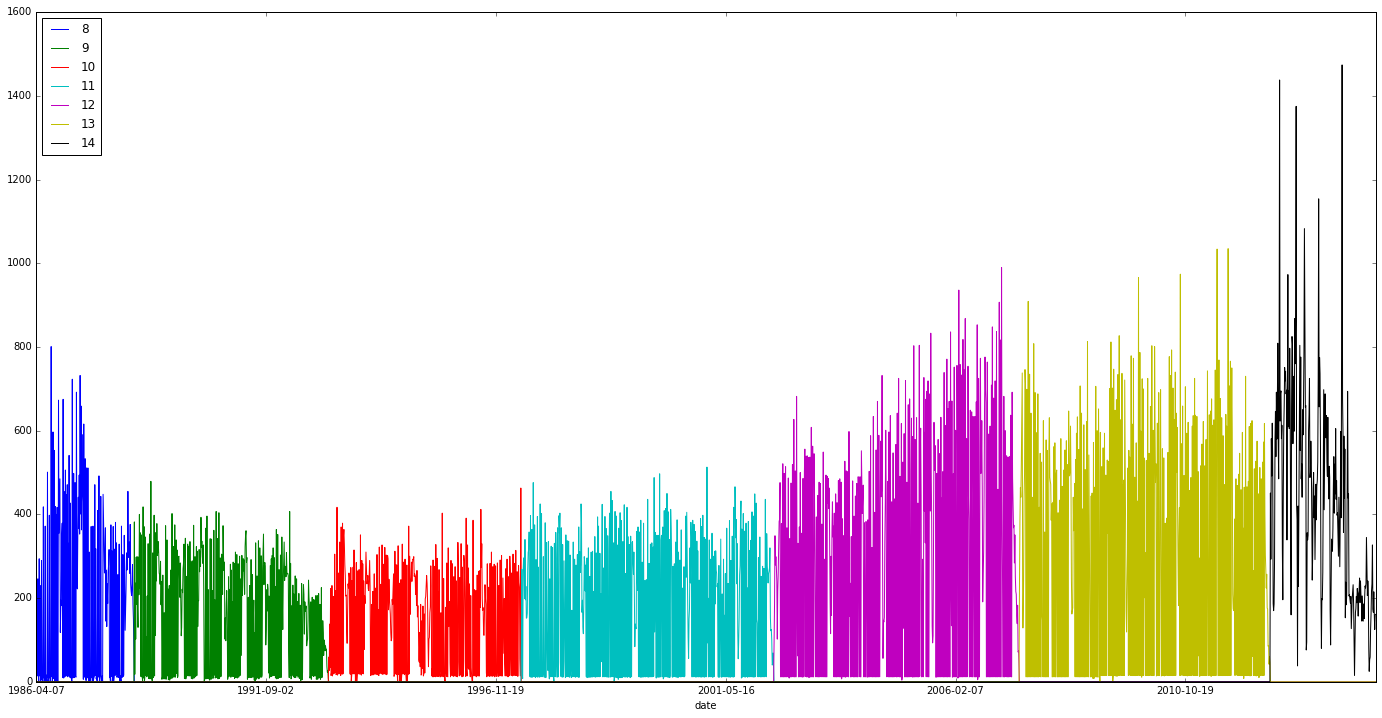

In [11]:

df_plot_day.columns = ['8', '9', '10', '11', '12', '13', '14']
df_plot_day.plot.line(figsize=(24, 12))


In [12]:
df_plot_day.head(10)

,8,9,10,11,12,13,14
date,,,,,,,
1986-04-07,106.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-14,154.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-17,14.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-21,246.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-24,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-04-28,294.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-05-01,14.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-05-05,230.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
depute_par_legislature = questions.groupby(['parlementaire','legislature']).count()[['url']].rename(columns = {'url':'nb_qe'})
depute_par_legislature.sort('nb_qe', ascending=False).head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,,nb_qe
parlementaire,legislature,
M. Jean-Luc Warsmann,12,4049
Thierry Lazaro,14,4036
M. Francis Falala,12,3920
M. Pierre Morel-A-L'Huissier,13,3717
M. Thierry Mariani,12,3469
Jean-Jacques Candelier,14,3413
Mme Marie-Jo Zimmermann,12,3014
M. Denis Jacquat,13,2951
M. Bruno Bourg-Broc,12,2916


In [19]:
depute_par_an = questions.groupby(['parlementaire','legislature', 'annee']).count()[['url']].rename(columns = {'url':'nb qe'})
depute_par_an.sort('nb qe', ascending=False).head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,,,nb qe
parlementaire,legislature,annee,
Thierry Lazaro,14,2015,1837
M. Francis Falala,12,2005,1708
Thierry Lazaro,14,2014,1587
M. Francis Falala,12,2006,1573
M. Jean-Luc Warsmann,12,2006,1458
M. Pierre Morel-A-L'Huissier,12,2006,1457
Isabelle Le Callennec,14,2013,1347
Jean-Jacques Candelier,14,2015,1336
M. Denis Jacquat,12,2006,1318


In [20]:
depute_par_jour = questions.groupby(['parlementaire','legislature', 'date']).count()[['url']].rename(columns = {'url':'nb qe'})
depute_par_jour.sort('nb qe', ascending=False).head(30)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


nb qe
parlementaire                legislature date             
Thierry Lazaro               14          2015-06-30    967
M. Michel Zumkeller          13          2011-04-26    588
Thierry Lazaro               14          2014-07-08    515
                                         2012-11-20    436
Michel Zumkeller             14          2012-11-20    431
Isabelle Le Callennec        14          2013-07-30    375
M. Pierre Morel-A-L'Huissier 13          2009-05-12    352
Mme Bérengère Poletti        13          2007-08-14    331
Michel Zumkeller             14          2012-11-13    317
Jean-Jacques Candelier       14          2015-09-15    298
                                         2015-06-23    287
M. Thierry Lazaro            13          2009-10-27    285
Jean-Jacques Candelier       14          2012-07-03    282
M. Bernard Carayon           13          2009-11-24    247
Thierry Lazaro               14          2015-09-22    238
M. Thierry Lazaro            13          2011-06-28    235
Thierry Lazaro               14          2014-07-01    229
Véronique Louwagie           14          2013-11-26    218
Jean-Jacques Candelier       14          2015-06-09    217
Michel Zumkeller             14          2013-12-10    215
M. Philippe Folliot          13          2010-02-09    214
Pierre Morel-A-L'Huissier    14          2015-07-07    210
Éric Ciotti                  14          2013-03-26    208
M. Marc Le Fur               13          2010-10-19    201
M. Michel Zumkeller          13          2010-03-02    200
David Douillet               14          2013-12-03    200
Thierry Lazaro               14          2015-08-11    196
M. Bruno Bourg-Broc          12          2006-11-14    194
M. André Aschieri            11          2002-04-15    182
M. Thierry Lazaro            13          2010-09-14    182

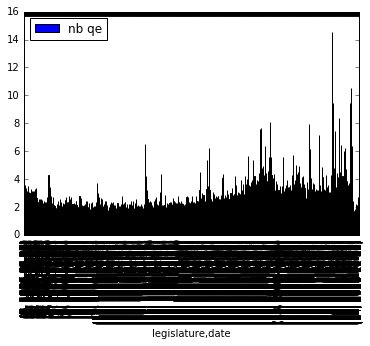

In [23]:
depute_par_jour.reset_index(['parlementaire', 'legislature', 'date']).groupby(['legislature', 'date']).mean().plot(kind='bar')

In [ ]:
depute_par_an.reset_index(['parlementaire', 'legislature', 'annee']).groupby(['legislature', 'annee']).median().plot(kind='bar')

In [32]:
depute_par_leg = pd.DataFrame(questions.groupby(['parlementaire','legislature'])['url'].count()).reset_index()

In [40]:
depute_par_leg_14 = depute_par_leg[depute_par_leg.legislature == 14].sort(['url'])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [41]:
depute_par_leg_14.head()

,parlementaire,legislature,url
4250,Sonia Lagarde,14,1
176,François Pupponi,14,1
281,Jean-François Copé,14,1
4183,Patrick Lebreton,14,1
94,Christophe Caresche,14,1


In [42]:
deputes_par_count_leg = depute_par_leg_14.groupby('url')['parlementaire'].count()

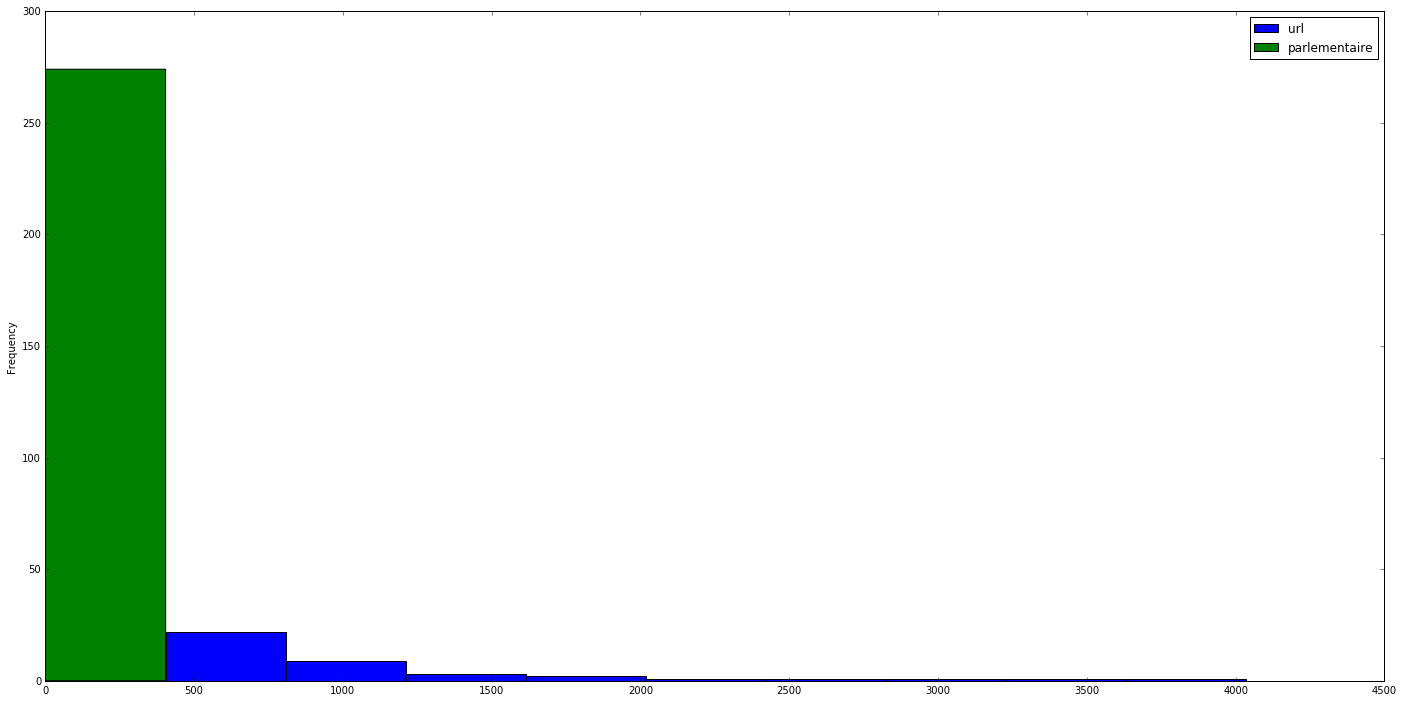

In [62]:
deputes_par_count_leg.reset_index().plot.hist(figsize=(24,12))

In [48]:
deputes_par_count_leg.plot.hist?

In [57]:
pd.DataFrame(deputes_par_count_leg)

,parlementaire
url,
1,5
2,8
3,4
4,2
5,2
6,6
7,5
8,6
9,5


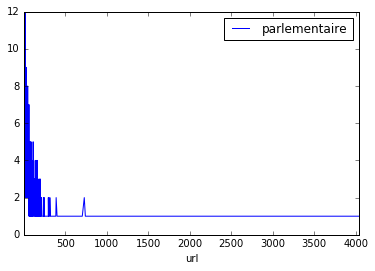

In [73]:
deputes_par_count_leg.reset_index().plot('url' , ['parlementaire'])

In [63]:
deputes_par_count_leg.describe?

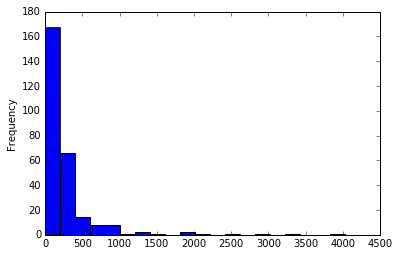

In [82]:
deputes_par_count_leg.reset_index()['url'].plot.hist( by='url' , bins=20)